## Lab 2 Airbnb
## Jiahang Wu


## Q1 Import & Descriptive stat

In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing into pd dataframes
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
#reviews_df = pd.read_csv('reviews.csv')
reviews_df = pd.read_pickle('./reviews_df_trans.pickle')
#pickle is generated by cells below b/c q2 (NLP) takes about 10 min


In [4]:
reviews_df.shape

(68275, 12)

In [45]:
# mini script to handle this instead
def desc_stat_helper (series):
    desc_stat = [] #init

    #append tuple in the same order and items of stat
    # as requested by the lab instructions
    try:
        desc_stat.append(str(series.name).replace('_','\_'))
        desc_stat.append(series.min())
        desc_stat.append(series.max())
        desc_stat.append(round(
            float(series.mean()), 2
        ))
        desc_stat.append(series.median())
        desc_stat.append(round(
            float(series.var()),2
            ))
        desc_stat.append(round(
            float(series.std()), 2
            ))
    except:
        print('function failed: ', series.name)

    return desc_stat #return a tuple


In [46]:
#manually transform the certain columns to make it work
list_trans = listings_df.copy() #copy

#list_trans['host_response_rate'].transform(
#    lambda x: float(str(x)[:-1])
#    )
#float(str(list_trans['host_response_rate'])[:-1])

list_trans['host_response_rate'] = list_trans['host_response_rate'].replace(
    '\%', '', regex=True).astype(float)  # remove %

list_trans['host_acceptance_rate'] = list_trans['host_acceptance_rate'].replace(
    '\%', '', regex=True).astype(float)  # remove %

money_var = ['price','weekly_price', 
             'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

for var in money_var:
    list_trans[var] = list_trans[var].replace(
        '[\$,]', '', regex=True).astype(float)  # remove $ and ,


#list_trans['host_response_rate']

In [47]:
# iterate over all variables 
var_to_do = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
             'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
             'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
             'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_90',
             'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
             'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
             'review_scores_value', 'reviews_per_month',]


output = [] #init
#form a matrix of outputs for the table of dictated variables per instructions
for var in var_to_do:
    output.append(
        desc_stat_helper(list_trans[var]))

#print(output)

#transform the output into LaTeX friendly format
output_str = '' #init str output

for ser in output: #for series in output
    out = ''
    out = ''.join(str(x) + ' & ' for x in ser)
    out = out[:-2] #remove extra & at the end
    
    output_str = output_str + out + '\\\\' + '\n\hline\n'

print(output_str) #print out in LaTeX friendly format

host\_response\_rate & 0.0 & 100.0 & 94.99 & 100.0 & 156.69 & 12.52 \\
\hline
host\_acceptance\_rate & 0.0 & 100.0 & 84.17 & 94.0 & 474.34 & 21.78 \\
\hline
host\_listings\_count & 0 & 749 & 58.9 & 2.0 & 29281.94 & 171.12 \\
\hline
host\_total\_listings\_count & 0 & 749 & 58.9 & 2.0 & 29281.94 & 171.12 \\
\hline
accommodates & 1 & 16 & 3.04 & 2.0 & 3.16 & 1.78 \\
\hline
bathrooms & 0.0 & 6.0 & 1.22 & 1.0 & 0.25 & 0.5 \\
\hline
bedrooms & 0.0 & 5.0 & 1.26 & 1.0 & 0.57 & 0.75 \\
\hline
beds & 0.0 & 16.0 & 1.61 & 1.0 & 1.02 & 1.01 \\
\hline
price & 10.0 & 4000.0 & 173.93 & 150.0 & 22002.18 & 148.33 \\
\hline
weekly\_price & 80.0 & 5000.0 & 922.39 & 750.0 & 432729.54 & 657.82 \\
\hline
monthly\_price & 500.0 & 40000.0 & 3692.1 & 2925.0 & 8409789.65 & 2899.96 \\
\hline
security\_deposit & 95.0 & 4500.0 & 324.7 & 250.0 & 108157.5 & 328.87 \\
\hline
cleaning\_fee & 5.0 & 300.0 & 68.38 & 50.0 & 2631.47 & 51.3 \\
\hline
guests\_included & 0 & 14 & 1.43 & 1.0 & 1.12 & 1.06 \\
\hline
extra\_peopl

In [ ]:
str(output[0])

## see pdf report for textaul response

## Pt II Sentiment Ana & New data
## Q2 

In [21]:
#reviews_df = pd.read_csv('reviews.csv')
# pickle preserved below

#checking comments
reviews_df['comments'].head(5)


0    My stay at islam's place was really cool! Good...
1    Great location for both airport and city - gre...
2    We really enjoyed our stay at Islams house. Fr...
3    The room was nice and clean and so were the co...
4    Great location. Just 5 mins walk from the Airp...
Name: comments, dtype: object

In [10]:
#too expensive to make the script work here,
# just write another method right here
#%run "sentiment_analysis_template.py"

import nltk
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment import SentimentAnalyzer
from nltk.corpus import subjectivity
from nltk.classify import NaiveBayesClassifier

comments = reviews_df['comments'].tolist()

score_list = [] #init
sid = SentimentIntensityAnalyzer()#init analyzer object

#for all comments in the series
for text in comments:
    score_dict = sid.polarity_scores(str(text)) #submit text (or 'nan') to sid
    score_list.append(score_dict) #store


In [22]:
#extract to separate series & convert to pd.series
#& append to df
reviews_df['negativity'] = pd.Series([x['neg'] for x in score_list])
reviews_df['neutrality'] = pd.Series([x['neu'] for x in score_list])
reviews_df['positivity'] = pd.Series([x['pos'] for x in score_list])
reviews_df['compound'] = pd.Series([x['compound'] for x in score_list])

In [38]:
#positivity/negativity simple
#counts of positive/negative words in comment

comments = reviews_df['comments'].tolist() #call again

#import csv using pd & convert to native list
negative_words = pd.read_csv('negative_words.csv',names=['neg'])
negative_words = negative_words['neg'].tolist()
positive_words = pd.read_csv('positive_words.csv', names=['pos'])
positive_words = positive_words['pos'].tolist()

simple_score = [] #init 

#*TErRiBlE* nested iterative coding, but easy for my brain
#god this thing took 10 minutes
for text in comments:
    
    text = str(text).split() # handles float.nan case & split for token
    text_score = [0, 0]  # [0] is neg, [1] is pos

    #iterate words 
    for token in text:
        #in operator is iterative
        if(token in negative_words): text_score[0] += 1
        if(token in positive_words): text_score[1] += 1

    #divide both score by total
    comment_total_word = len(text)
    #handles case when text is empty...again?? I cant be bothered to investigate this
    if(len(text) != 0):
        text_score[0] = text_score[0]/comment_total_word
        text_score[1] = text_score[1]/comment_total_word

    #print(text_score)
    simple_score.append(text_score) #store


In [40]:
#simple_score
#add to df
reviews_df['negativity_simple'] = pd.Series([x[0] for x in simple_score])
reviews_df['positivity_simple'] = pd.Series([x[1] for x in simple_score])

In [42]:
# pickle new reviews_df
reviews_df.to_pickle('./reviews_df_trans.pickle')

In [ ]:
#retrieve from pickle
reviews_df = pd.read_pickle('./reviews_df_trans.pickle')

## Q3 score means added to listing_df

In [61]:
listings_df = pd.read_csv('listings.csv')

In [61]:
listing_ids = reviews_df['listing_id'].unique() #get unique ids

listing_score_avg = {} #init dict

#aggregate and find mean for each lsiting
for this_listing in listing_ids:
    #temp df with only rows of the specific listing
    temp_df = reviews_df[reviews_df['listing_id'] == this_listing]
    
    variables_to_avg = ['negativity', 'neutrality', 'positivity',
                        'compound', 'positivity_simple', 'negativity_simple']
    
    this_mean_scores = [] #init
    #find and store means
    for var in variables_to_avg:
        this_mean_scores.append(
            temp_df[var].mean()
            )
    listing_score_avg[this_listing] = this_mean_scores


In [62]:
#not all listings have reviews
#add accordingly to listing_df


variables_to_add = ['negativity_mean', 'neutrality_mean', 'positivity_mean',
                    'compound_mean', 'positivity_simple_mean', 'negativity_simple_mean']

#init columns with value 0
for var in variables_to_add:
    listings_df[var] = float(0)

#listings_df #verified

#update individual rows
listings_to_update = list(listing_score_avg.keys())

#for all ids with reviews
for this_id in listings_to_update:
    #for each variables 
    for var in range(len(variables_to_add)):
        this_var_name = variables_to_add[var]
        listings_df.loc[listings_df['listing_id'] == this_id, this_var_name] = listing_score_avg.get(this_id)[var]

#listings_df # verified

## Pt III Mining
## Q4

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [ ]:
#Manual handling 
#should use .astype() + transform(), see next cell

df_q4 = listings_df[['property_type','room_type','accommodates','bathrooms','bedrooms']]
df_q4['bedrooms'] = df_q4['bedrooms'].replace(1,'1bed')
df_q4['bedrooms'] = df_q4['bedrooms'].replace(2,'2beds')
df_q4['bedrooms'] = df_q4['bedrooms'].replace(3,'3beds')
df_q4['bedrooms'] = df_q4['bedrooms'].replace(4,'4beds')
df_q4['bedrooms'] = df_q4['bedrooms'].replace(5,'5beds')
df_q4['accommodates'] = df_q4['accommodates'].replace(1,'1p')
df_q4['accommodates'] = df_q4['accommodates'].replace(2,'2p')
df_q4['accommodates'] = df_q4['accommodates'].replace(3,'3p')
df_q4['accommodates'] = df_q4['accommodates'].replace(4,'4p')
df_q4['accommodates'] = df_q4['accommodates'].replace(5,'5p')
df_q4['accommodates'] = df_q4['accommodates'].replace(6,'6p')
df_q4['accommodates'] = df_q4['accommodates'].replace(7,'7p')
df_q4['accommodates'] = df_q4['accommodates'].replace(8,'8p')
df_q4['accommodates'] = df_q4['accommodates'].replace(9,'9p')
df_q4['accommodates'] = df_q4['accommodates'].replace(10,'10p')
df_q4['accommodates'] = df_q4['accommodates'].replace(11,'11p')
df_q4['accommodates'] = df_q4['accommodates'].replace(12,'12p')
df_q4['accommodates'] = df_q4['accommodates'].replace(14,'14p')
df_q4['accommodates'] = df_q4['accommodates'].replace(16,'16p')

#declare values set
dataset = df_q4.values

In [51]:
#handling bathrooms afterward for readablity later
df_q4 = df_q4.astype(str)
df_q4[['bathrooms']] = df_q4[['bathrooms']].transform(lambda x: x+'bath')
df_q4


,property_type,room_type,accommodates,bathrooms,bedrooms
0,House,Entire home/apt,4p,1.5bath,2beds
1,Apartment,Private room,2p,1.0bath,1bed
2,Apartment,Private room,2p,1.0bath,1bed
3,House,Private room,4p,1.0bath,1bed
4,House,Private room,2p,1.5bath,1bed
...,...,...,...,...,...
3580,Apartment,Private room,3p,1.0bath,1bed
3581,Apartment,Private room,2p,1.0bath,1bed
3582,Apartment,Entire home/apt,4p,1.0bath,1bed
3583,Apartment,Private room,2p,1.0bath,1bed


In [52]:
#declare values set
dataset = df_q4.values

#init encoder from mlx
te = TransactionEncoder()
te_ary = te.fit(dataset.astype(str)).transform(dataset.astype(str))

#pipe data to apriori
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets['itemcount'] = frequent_itemsets['itemsets'].apply(
    lambda x: len(x))
#if the data ends with a '.0' or '.5', it means bathrooms number. Otherwise, it means accommodates.


In [53]:
print('shape is: ',frequent_itemsets.shape)

#5 most support
print(frequent_itemsets.sort_values(by='support', ascending=False).head(5))

#5 least support
frequent_itemsets.sort_values(by='support', ascending=True).head(5)


shape is:  (70, 3)
     support              itemsets  itemcount
0   0.767364             (1.0bath)          1
8   0.728591           (Apartment)          1
1   0.663598                (1bed)          1
17  0.597768  (Apartment, 1.0bath)          2
9   0.593305     (Entire home/apt)          1


,support,itemsets,itemcount
42,0.100418,"(Entire home/apt, 1.0bath, 2beds)",3
13,0.100418,"(1.0bath, 2beds)",2
27,0.101255,"(2.0bath, Entire home/apt)",2
26,0.102929,"(1p, Private room)",2
50,0.102929,"(1p, Private room, 1bed)",3


In [54]:
#reapply algorithm with 0.2 minSup
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets['itemcount'] = frequent_itemsets['itemsets'].apply(
    lambda x: len(x))


In [55]:
print('shape is: ', frequent_itemsets.shape)

#5 most support
print(frequent_itemsets.sort_values(by='support', ascending=False).head(5))

#5 least support
frequent_itemsets.sort_values(by='support', ascending=True).head(5)


shape is:  (31, 3)
    support              itemsets  itemcount
0  0.767364             (1.0bath)          1
3  0.728591           (Apartment)          1
1  0.663598                (1bed)          1
8  0.597768  (Apartment, 1.0bath)          2
4  0.593305     (Entire home/apt)          1


,support,itemsets,itemcount
29,0.216179,"(Apartment, 1.0bath, 2p, 1bed)",4
30,0.217573,"(Apartment, Entire home/apt, 1.0bath, 1bed)",4
28,0.219247,"(Apartment, Private room, 1bed)",3
18,0.219247,"(Apartment, Private room)",2
27,0.225105,"(Apartment, Entire home/apt, 1bed)",3


In [94]:
#5 most support
print(frequent_itemsets.sort_values(by='support', ascending=False).head(20))


     support                               itemsets  itemcount
0   0.767364                              (1.0bath)          1
3   0.728591                            (Apartment)          1
1   0.663598                                 (1bed)          1
8   0.597768                   (Apartment, 1.0bath)          2
4   0.593305                      (Entire home/apt)          1
6   0.567922                        (1.0bath, 1bed)          2
17  0.492050           (Apartment, Entire home/apt)          2
12  0.461646                      (Apartment, 1bed)          2
9   0.446583             (Entire home/apt, 1.0bath)          2
20  0.427615             (Apartment, 1.0bath, 1bed)          3
2   0.413668                                   (2p)          1
24  0.387727  (Apartment, Entire home/apt, 1.0bath)          3
14  0.384379                   (Private room, 1bed)          2
5   0.384379                         (Private room)          1
7   0.358996                          (1.0bath, 2p)    

## Q5

In [ ]:
from itertools import combinations
import operator

In [ ]:
def create_candidate(df):
    can = []
    for transaction in df:
        for t in transaction:
            t = frozenset([t])
            if t not in can:
                can.append(t)
    return can

def create_candidates(freq_item, k):
    ck = []
    
    # for generating candidate of size two (2-itemset)
    if k == 0:
        for f1, f2 in combinations(freq_item, 2):
            item = f1 | f2 # union of two sets
            ck.append(item)
    else:    
        for f1, f2 in combinations(freq_item, 2):       
            # if the two (k+1)-item sets has
            # k common elements then they will be
            # unioned to be the (k+2)-item candidate
            intersection = f1 & f2
            if len(intersection) == k:
                item = f1 | f2
                if item not in ck:
                    ck.append(item)
    return ck

def apriori_1(df, min_support):

    # the candidate sets for the 1-item is different,
    # create them independently from others
    c1 = create_candidate(df)
    freq_item, item_support_dict = create_freq_item(df, c1, min_support)
    freq_items = [freq_item]
    
    k = 0
    while len(freq_items[k]) > 0:
        freq_item = freq_items[k]
        ck = create_candidates(freq_item, k)       
        freq_item, item_support = create_freq_item(df, ck, min_support)
        freq_items.append(freq_item)
        item_support_dict.update(item_support)
        k += 1
        
    return freq_items, item_support_dict
def create_freq_item(df, ck, min_support):
    # loop through the transaction and compute
    # the count for each candidate (item)
    item_count = {}
    for transaction in df:
        for item in ck:
            if item.issubset(transaction):
                if item not in item_count: 
                    item_count[item] = 1
                else: 
                    item_count[item] += 1    
    
    n_row = df.shape[0]
    freq_item = []
    item_support = {}
    # if the support of an item is greater than the 
    # min_support, then it is considered as frequent
    for item in item_count:
        support = item_count[item] / n_row
        if support >= min_support:
            freq_item.append(item)
        item_support[item] = support
        
    return freq_item, item_support


freq_items, item_support_dict = apriori_1(dataset, min_support = 0.1)
sorted_dict = dict( sorted(item_support_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))
# sorted_dict = dict(sorted(  item_support_dict.items(),
#                             key=operator.itemgetter(0.1),
#                             reverse=True))
sorted_dict

## Pt IV Linear Regression
## Q6

In [ ]:
import statsmodels.api as sm

In [ ]:
X_variables = ['host_response_rate',
               'review_scores_rating',
               'review_scores_accuracy',
               'review_scores_cleanliness',
               'review_scores_checkin',
               'review_scores_communication',
               'negativity_mean', 'positivity_mean',
                'positivity_simple_mean', 'negativity_simple_mean']

In [87]:
#these 2 var somehow did not get tranformed earlier... forcing it again
#I didn't want to run the somewhat costly code again,
#  in hindsight I shouldve
listings_df['host_response_rate'] = listings_df['host_response_rate'].replace(
    '\%', '', regex=True).astype(float)  # remove %

listings_df['price'] = listings_df['price'].replace(
    '[\$,]', '', regex=True).astype(float)  # remove $ and ,

#otherwise OLS throws error when attempting dot product


In [88]:
#declare X from Q3 transformed df
X = listings_df[['host_response_rate',
                 'review_scores_rating',
                 'review_scores_accuracy',
                 'review_scores_cleanliness',
                 'review_scores_checkin',
                 'review_scores_communication',
                 'negativity_mean', 'positivity_mean',
                'positivity_simple_mean', 'negativity_simple_mean']]
#cast to np
X = np.asarray(X)
X = np.array(X, dtype=float) #force float for OLS compatibilty

y = np.asarray(listings_df['price'])
y = y.astype(float)

#fit model with X and Y for a multivariate linear regression
model = sm.OLS(y, X, missing='drop')
results = model.fit()

#print full results
print(results.summary())
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

#summary:
#R2 = 0.706
#Negativity (composite and simple) appear to be the most significant variables
#This is somewhat surprising  but perhaps not entirely odd
# I expected cleanliness to be significant (per personal experience)
#   but, most airbnb users were trying to save money
#   so the price becomes a key factor in reviews in the end


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.706
Model:                            OLS   Adj. R-squared (uncentered):              0.705
Method:                 Least Squares   F-statistic:                              607.5
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:44:49   Log-Likelihood:                         -15534.
No. Observations:                2543   AIC:                                  3.109e+04
Df Residuals:                    2533   BIC:                                  3.115e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Q7

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [153]:
#declare X from Q3 transformed df
X = listings_df[['host_response_rate',
                 'review_scores_rating',
                 'review_scores_accuracy',
                 'review_scores_cleanliness',
                 'review_scores_checkin',
                 'review_scores_communication',
                 'negativity_mean', 'positivity_mean',
                'positivity_simple_mean', 'negativity_simple_mean']]
#cast to np
X = np.asarray(X)
X = np.array(X, dtype=float)  # force float for OLS compatibilty

X[0]


array([nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.])

In [164]:
#copy
X_q7 = X.copy()
y_q7 = y.copy()

#missing value analysis
type(X_q7)
print(sum(np.isnan(X_q7)))
print(X_q7.shape)

#there are quite a bit of missing values in some of the features
#Because we hypothesize that response rate is a PC , we dont want to skew the data in anyway.
# and we will have to drop them



#iterative removal
#for all response rate values in arr
rows_to_del = []
for i in range(len(X_q7)):
    
    if(np.isnan(X_q7[i][0])): #if this response rate is nan
        rows_to_del.append(i)
        #print('ya')

X_q7 = np.delete(X_q7, rows_to_del,0)  # drop the rows found
y_q7 = np.delete(y_q7, rows_to_del,0)
X_q7.shape

#verify nan dropped for x1 (resonse rate)
print(sum(np.isnan(X_q7)))

#fo this again for overall score
rows_to_del = []
for i in range(len(X_q7)):

    if(np.isnan(X_q7[i][1])):  # if this response rate is nan
        rows_to_del.append(i)
        #print('ya')

X_q7 = np.delete(X_q7, rows_to_del, 0)  # drop the rows found
y_q7 = np.delete(y_q7, rows_to_del, 0)
print(sum(np.isnan(X_q7)))
X_q7.shape


[471 813 823 818 820 818   0   0   0   0]
(3585, 10)
[  0 562 570 566 567 566   0   0   0   0]
[0 0 9 5 6 5 0 0 0 0]


(2552, 10)

In [165]:
#replace the remainng missing with median
#For the other vlaues, I will use median instead

a = X_q7.copy()
#Obtain mean of columns as you need, nanmean is convenient.
col_mean = np.nanmedian(a, axis=0)
print(col_mean)

#Find indices that you need to replace
inds = np.where(np.isnan(a))

#Place column means in the indices. Align the arrays using take
a[inds] = np.take(col_mean, inds[1])

print(sum(np.isnan(a)))
a.shape


[1.00000000e+02 9.40000000e+01 1.00000000e+01 1.00000000e+01
 1.00000000e+01 1.00000000e+01 1.23333333e-02 2.83605311e-01
 7.35545742e-02 3.30855940e-03]
[0 0 0 0 0 0 0 0 0 0]


(2552, 10)

In [166]:
#split data
X_train, X_test, y_train, y_test = train_test_split(
    a, y_q7, test_size=0.2)

#standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
#apply pca
pca = PCA(n_components=3)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

#explained variance says that component 1 explains 60% of the variance after standardization


array([0.60401559, 0.23097157, 0.16501284])

In [178]:
model_pca = sm.OLS(y_train, X_train, missing='drop')
results_pca = model_pca.fit()

#print full results
print(results_pca.summary())
print("Parameters: ", results_pca.params)
print("R2: ", results_pca.rsquared)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.6343
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                       0.593
Time:                        20:32:44   Log-Likelihood:                         -13703.
No. Observations:                2041   AIC:                                  2.741e+04
Df Residuals:                    2038   BIC:                                  2.743e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Pt V Visualization
## Q8 i)

In [94]:
import matplotlib.pyplot as plt
import seaborn as sb

negative:  25 positive:  2734


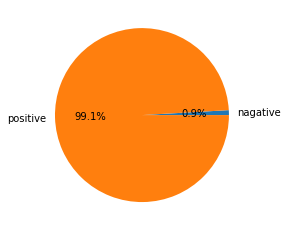

In [97]:
#extract col
all_compound_scores = listings_df['compound_mean'].tolist()

#remove 0s
try:
    while(True): 
        #remove() only remove one item
        all_compound_scores.remove(np.float64(0)) 
except:
    pass

#verified
#len(all_compound_scores)
#all_compound_scores

#count pos and neg
pos_neg_count = [0,0] #where 0 is neg & 1 is pos
for e in all_compound_scores:
    if(e < 0): pos_neg_count[0] += 1 #if smaller than 1, increment 1
    else: pos_neg_count[1] += 1 #0 have been handled



#plot
labels = ['nagative','positive']
plt.pie(pos_neg_count, labels=labels, autopct='%1.1f%%')
plt.show

print('negative: ', pos_neg_count[0], 'positive: ', pos_neg_count[1],)


## ii)

In [90]:
#reusing declaration from q6
df_q6 = listings_df[['host_response_rate',
                 'review_scores_rating',
                 'review_scores_accuracy',
                 'review_scores_cleanliness',
                 'review_scores_checkin',
                 'review_scores_communication',
                 'negativity_mean', 'positivity_mean',
                'positivity_simple_mean', 'negativity_simple_mean']]


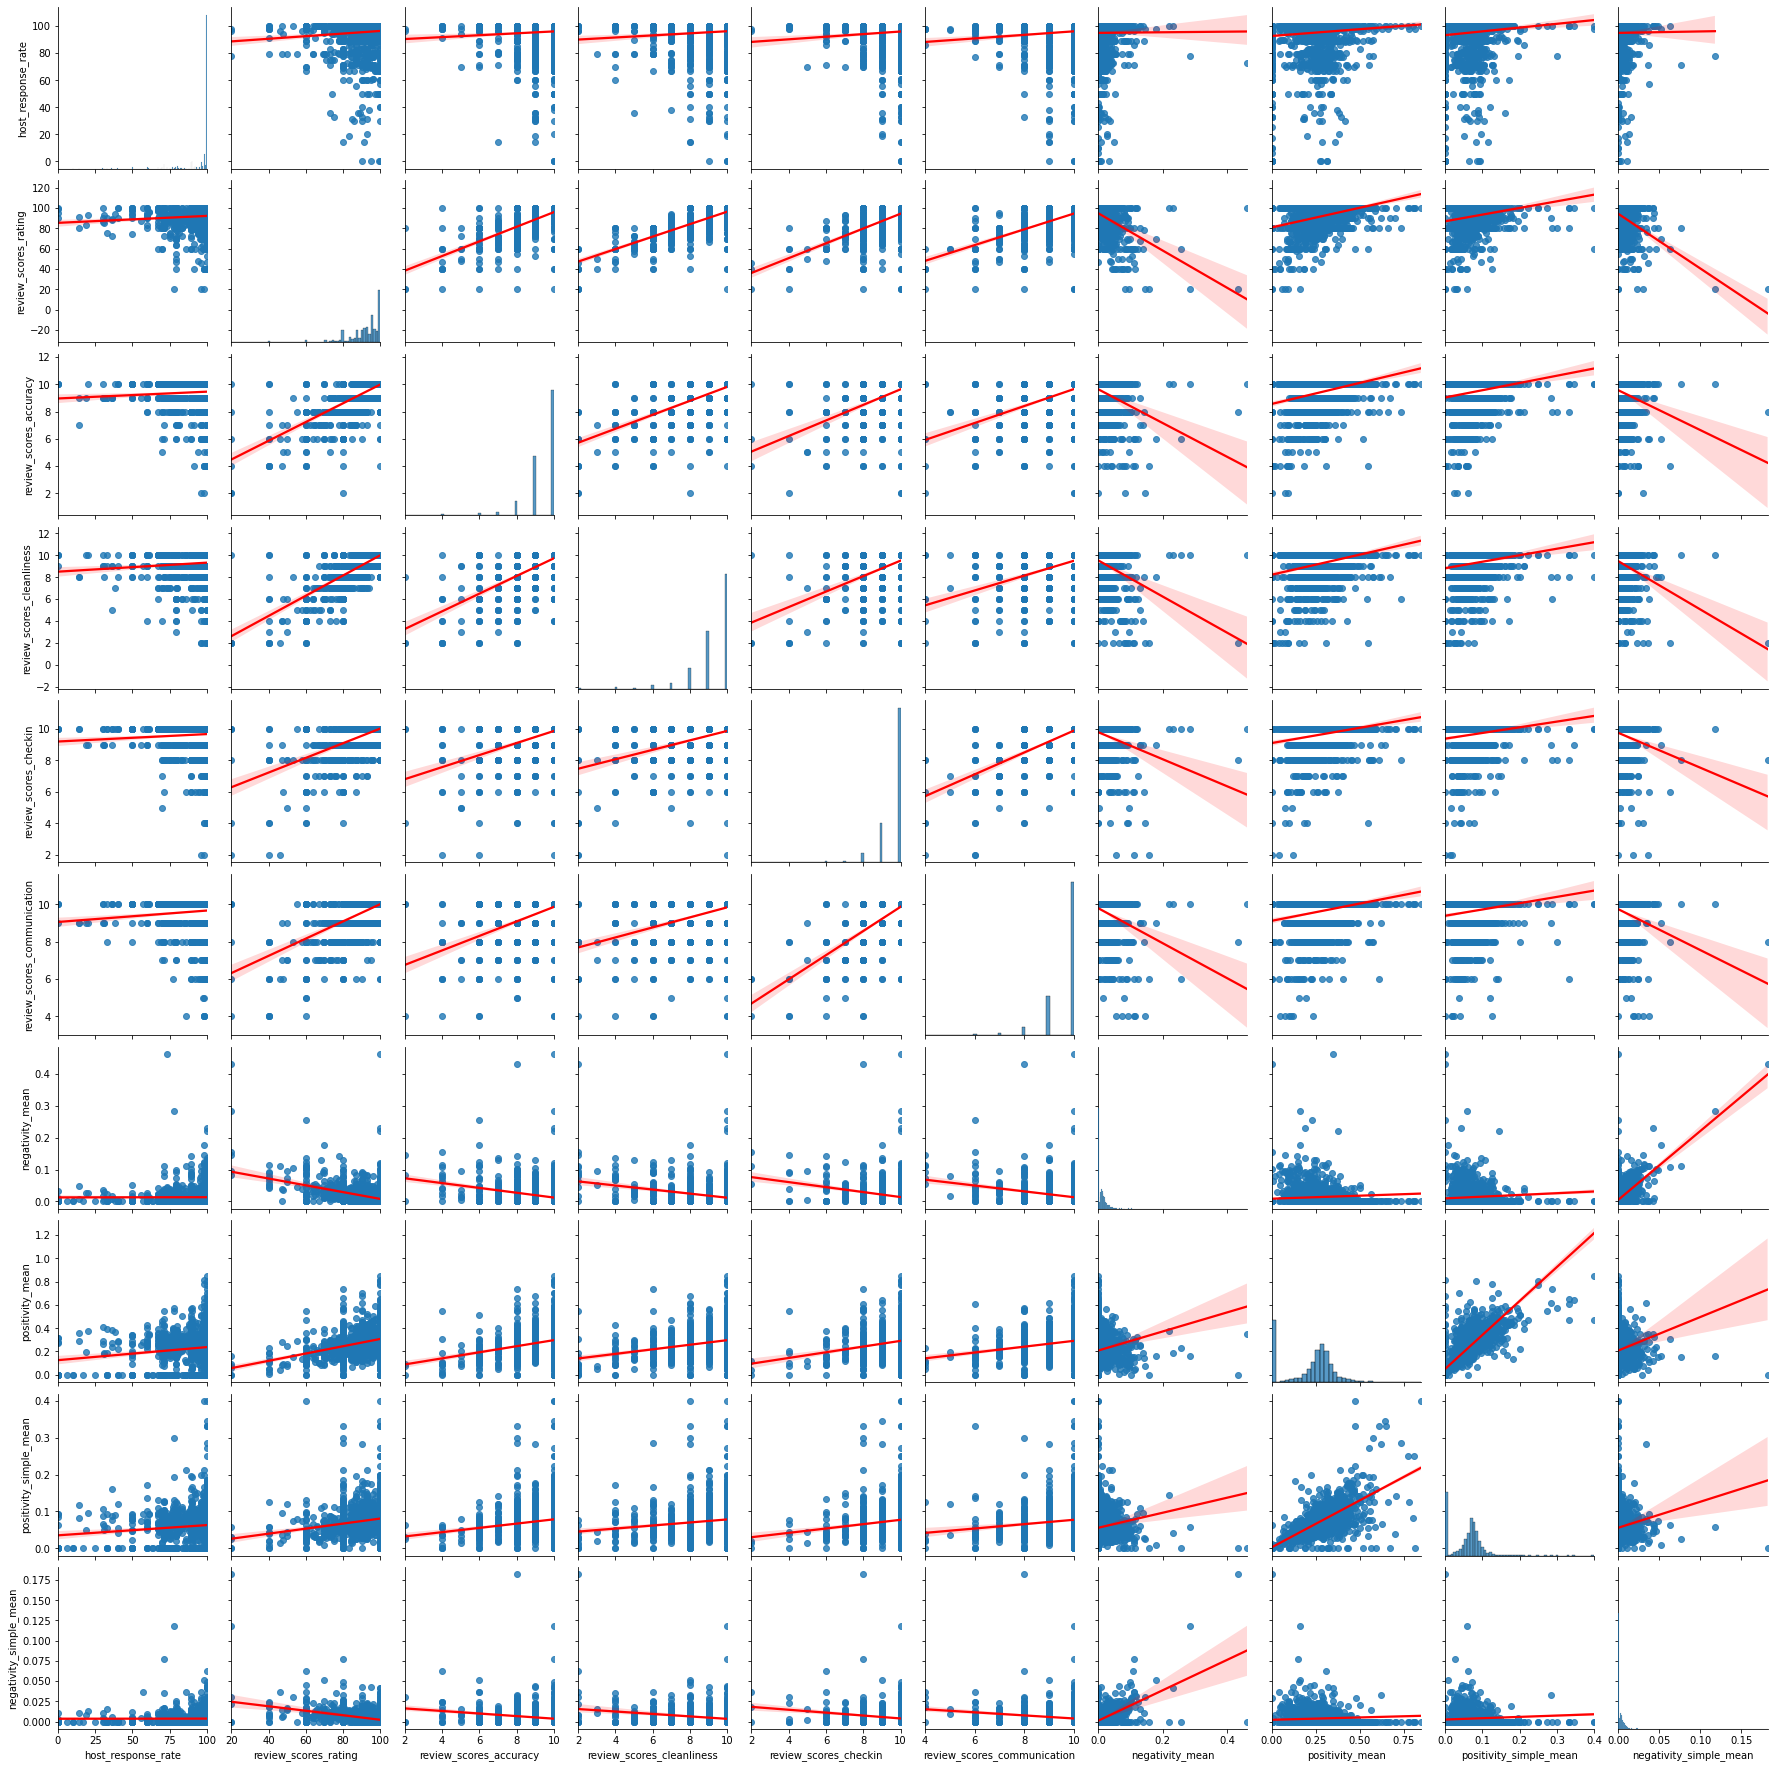

In [106]:
sb.pairplot(df_q6, kind="reg", plot_kws={'line_kws': {'color': 'red'}})

#this graph is great but needs A LOT of explanations...see report


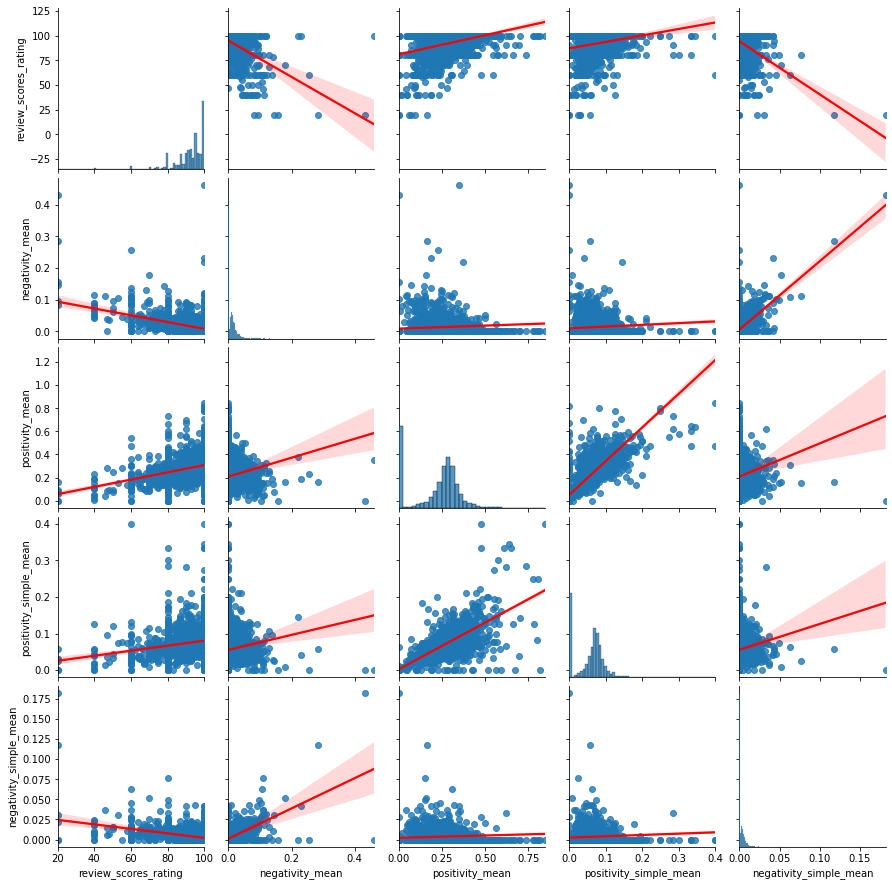

In [110]:
df_q6_mod = listings_df[['review_scores_rating',
                         'negativity_mean',
                         'positivity_mean',
                         'positivity_simple_mean',
                         'negativity_simple_mean']]

sb.pairplot(df_q6_mod, kind="reg", plot_kws={'line_kws': {'color': 'red'}})


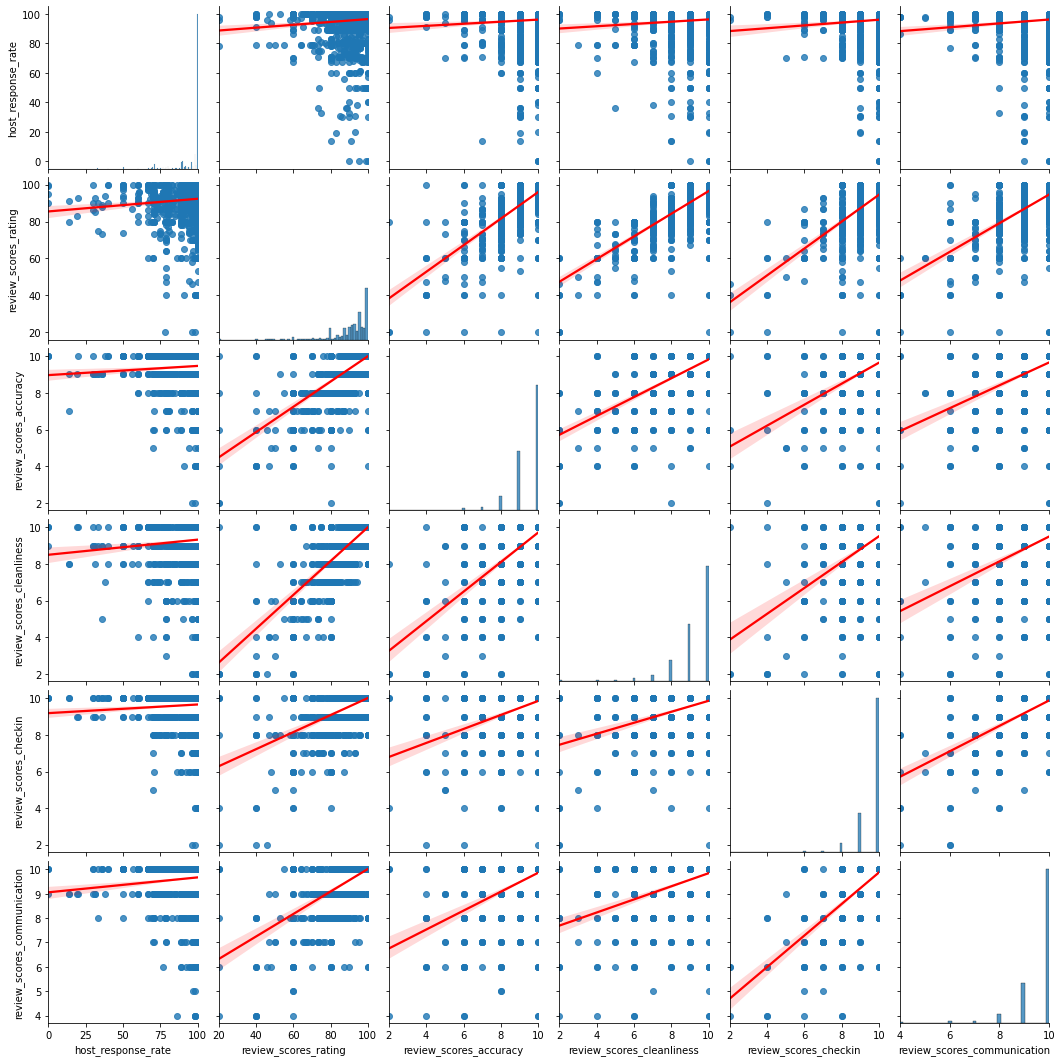

In [108]:
df_q6 = listings_df[['host_response_rate',
                     'review_scores_rating',
                     'review_scores_accuracy',
                     'review_scores_cleanliness',
                     'review_scores_checkin',
                     'review_scores_communication',
                     ]]

sb.pairplot(df_q6, kind="reg", plot_kws={'line_kws': {'color': 'red'}})


## iii)

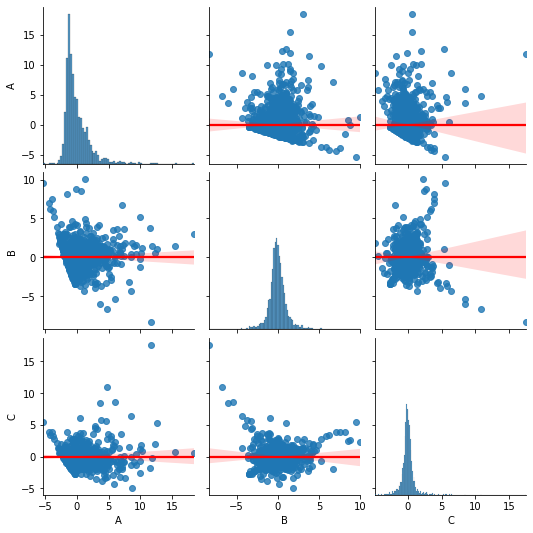

In [177]:
#conver to pd.df to make sb work
pca_df = pd.DataFrame(X_train,columns=['A','B','C'])
#pca_df

sb.pairplot(pca_df, kind="reg", plot_kws={'line_kws': {'color': 'red'}})


## iv)

In [92]:
#print full results
print(results.summary())
print("Parameters: ", results.params)
print("R2: ", results.rsquared)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.706
Model:                            OLS   Adj. R-squared (uncentered):              0.705
Method:                 Least Squares   F-statistic:                              607.5
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                        0.00
Time:                        14:33:50   Log-Likelihood:                         -15534.
No. Observations:                2543   AIC:                                  3.109e+04
Df Residuals:                    2533   BIC:                                  3.115e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## v)

In [179]:
#print full results
print(results_pca.summary())
print("Parameters: ", results_pca.params)
print("R2: ", results_pca.rsquared)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.6343
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                       0.593
Time:                        20:32:53   Log-Likelihood:                         -13703.
No. Observations:                2041   AIC:                                  2.741e+04
Df Residuals:                    2038   BIC:                                  2.743e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------